# Dados

In [1]:
# from google.colab import drive
# drive.mount('/content/drive')
import os
from pathlib import Path
import pandas as pd
import numpy as np
import cv2
import shutil

# os.chdir('/content/drive/MyDrive/Projetos/Artigos CBEB/Artigo SBEB 2024')
DDR_DIR = Path.cwd() / 'DDR-dataset/DR_grading'
IDRID_DIR = Path.cwd() / 'IDRID-Classificacao'
#FGADR_DIR = Path.cwd() / 'FGADR Dataset/Seg-set'

## Correção das erratas (CORREÇÕES FEITAS ✅)
Ver: https://www.adcis.net/en/third-party/messidor/

##### 24 October 2016: Erratum in Base11 and Base 13 Excel files
* Image Base11/20051020_64007_0100_PP.tif: Retinopathy grade should be 3 (instead of 1).
* Image Base11/20051020_63936_0100_PP.tif: Retinopathy grade should be 1 (instead of 3).
* Image Base13/20060523_48477_0100_PP.tif: Retinopathy grade should be 3 (instead of 2).

In [ ]:
anno_base11 = pd.read_excel(TRAIN_DIR / 'Annotations/Annotation_Base11.xls')
anno_base13 = pd.read_excel(TRAIN_DIR / 'Annotations/Annotation_Base13.xls')

In [ ]:
anno_base11.loc[anno_base11['Image name'] == '20051020_64007_0100_PP.tif', 'Retinopathy grade'] = 3
anno_base11.loc[anno_base11['Image name'] == '20051020_63936_0100_PP.tif', 'Retinopathy grade'] = 1
anno_base13.loc[anno_base13['Image name'] == '20060523_48477_0100_PP.tif', 'Retinopathy grade'] = 3


display(anno_base11.loc[anno_base11['Image name'] == '20051020_64007_0100_PP.tif'])
display(anno_base11.loc[anno_base11['Image name'] == '20051020_63936_0100_PP.tif'])
display(anno_base13.loc[anno_base13['Image name'] == '20060523_48477_0100_PP.tif'])

,Image name,Ophthalmologic department,Retinopathy grade,Risk of macular edema
66,20051020_64007_0100_PP.tif,Service Ophtalmologie Lariboisière,3,2


,Image name,Ophthalmologic department,Retinopathy grade,Risk of macular edema
65,20051020_63936_0100_PP.tif,Service Ophtalmologie Lariboisière,1,2


,Image name,Ophthalmologic department,Retinopathy grade,Risk of macular edema
66,20060523_48477_0100_PP.tif,Service Ophtalmologie Lariboisière,3,0


##### 31 August 2016: Erratum in Base11 Excel file
* Image 20051020_63045_0100_PP.tif: Retinopathy grade should be 0 (instead of 3).

In [ ]:
anno_base11.loc[anno_base11['Image name'] == '20051020_63045_0100_PP.tif', 'Retinopathy grade'] = 0
display(anno_base11.loc[anno_base11['Image name'] == '20051020_63045_0100_PP.tif'])

,Image name,Ophthalmologic department,Retinopathy grade,Risk of macular edema
59,20051020_63045_0100_PP.tif,Service Ophtalmologie Lariboisière,0,0


##### 16 August 2017: Image duplicates in Base33
13 duplicate image pairs were discovered in this dataset. Here is the list of these pairs:

* 20051202_55582_0400_PP.tif – 20051202_54744_0400_PP.tif
* 20051202_41076_0400_PP.tif – 20051202_40508_0400_PP.tif
* 20051202_48287_0400_PP.tif – 20051202_41238_0400_PP.tif
* 20051202_48586_0400_PP.tif – 20051202_41260_0400_PP.tif
* 20051202_55457_0400_PP.tif – 20051202_54530_0400_PP.tif
* 20051202_55626_0400_PP.tif – 20051205_33025_0400_PP.tif
* 20051202_54783_0400_PP.tif – 20051202_55607_0400_PP.tif
* 20051202_48575_0400_PP.tif – 20051202_41034_0400_PP.tif
* 20051205_32966_0400_PP.tif – 20051205_35099_0400_PP.tif
* 20051202_55484_0400_PP.tif – 20051202_54555_0400_PP.tif
* 20051205_32981_0400_PP.tif – 20051205_35110_0400_PP.tif
* 20051202_55562_0400_PP.tif – 20051202_54611_0400_PP.tif
* 20051202_54547_0400_PP.tif – 20051202_55498_0400_PP.tif
---##### 09 February 2018: Grading inconsistencies among image duplicates
Among the image duplicates in Base 33 (see 16 August 2017 erratum), 2 of them have inconsistent grades:

* 20051202_55562_0400_PP.tif and 20051202_54611_0400_PP.tif have different ‘Risk of macular edema’ grades (0 and 1 respectively)
* 20051202_55626_0400_PP.tif and 20051205_33025_0400_PP.tif have different Retinopathy grades (2 and 3 respectively)

##### 09 February 2018: Grading inconsistencies among image duplicates
Among the image duplicates in Base 33 (see 16 August 2017 erratum), 2 of them have inconsistent grades:

* 20051202_55562_0400_PP.tif and 20051202_54611_0400_PP.tif have different ‘Risk of macular edema’ grades (0 and 1 respectively)
* 20051202_55626_0400_PP.tif and 20051205_33025_0400_PP.tif have different Retinopathy grades (2 and 3 respectively)

In [ ]:
# def compare_imgs(pair_image_string):
#     img1_name = pair_image_string.split(' ')[0]
#     img2_name = pair_image_string.split(' ')[2]
#     img1 = cv2.imread(str(TRAIN_DIR / f'Bases/Base33/{img1_name}'))
#     img2 = cv2.imread(str(TRAIN_DIR / f'Bases/Base33/{img2_name}'))

#     if np.array_equal(img1, img2):
#         print(f'As imagens {img1_name} - {img2_name} são iguais!')
#     else:
#         print('Imagens diferentes!')


# compare_imgs('20051202_55582_0400_PP.tif – 20051202_54744_0400_PP.tif')
# compare_imgs('20051202_41076_0400_PP.tif – 20051202_40508_0400_PP.tif')
# compare_imgs('20051202_48287_0400_PP.tif – 20051202_41238_0400_PP.tif')
# compare_imgs('20051202_48586_0400_PP.tif – 20051202_41260_0400_PP.tif')
# compare_imgs('20051202_55457_0400_PP.tif – 20051202_54530_0400_PP.tif')
# compare_imgs('20051202_55626_0400_PP.tif – 20051205_33025_0400_PP.tif')
# compare_imgs('20051202_54783_0400_PP.tif – 20051202_55607_0400_PP.tif')
# compare_imgs('20051202_48575_0400_PP.tif – 20051202_41034_0400_PP.tif')
# compare_imgs('20051205_32966_0400_PP.tif – 20051205_35099_0400_PP.tif')
# compare_imgs('20051202_55484_0400_PP.tif – 20051202_54555_0400_PP.tif')
# compare_imgs('20051205_32981_0400_PP.tif – 20051205_35110_0400_PP.tif')
# compare_imgs('20051202_55562_0400_PP.tif – 20051202_54611_0400_PP.tif')
# compare_imgs('20051202_54547_0400_PP.tif – 20051202_55498_0400_PP.tif')

As imagens 20051202_55582_0400_PP.tif - 20051202_54744_0400_PP.tif são iguais!
As imagens 20051202_41076_0400_PP.tif - 20051202_40508_0400_PP.tif são iguais!
As imagens 20051202_48287_0400_PP.tif - 20051202_41238_0400_PP.tif são iguais!
As imagens 20051202_48586_0400_PP.tif - 20051202_41260_0400_PP.tif são iguais!
As imagens 20051202_55457_0400_PP.tif - 20051202_54530_0400_PP.tif são iguais!
As imagens 20051202_55626_0400_PP.tif - 20051205_33025_0400_PP.tif são iguais!
As imagens 20051202_54783_0400_PP.tif - 20051202_55607_0400_PP.tif são iguais!
As imagens 20051202_48575_0400_PP.tif - 20051202_41034_0400_PP.tif são iguais!
As imagens 20051205_32966_0400_PP.tif - 20051205_35099_0400_PP.tif são iguais!
As imagens 20051202_55484_0400_PP.tif - 20051202_54555_0400_PP.tif são iguais!
As imagens 20051205_32981_0400_PP.tif - 20051205_35110_0400_PP.tif são iguais!
As imagens 20051202_55562_0400_PP.tif - 20051202_54611_0400_PP.tif são iguais!
As imagens 20051202_54547_0400_PP.tif - 20051202_554

In [ ]:
# deletando as imagens duplicadas:
# (TRAIN_DIR / 'Bases/Base33/20051202_54744_0400_PP.tif').unlink()
# (TRAIN_DIR / 'Bases/Base33/20051202_40508_0400_PP.tif').unlink()
# (TRAIN_DIR / 'Bases/Base33/20051202_41238_0400_PP.tif').unlink()
# (TRAIN_DIR / 'Bases/Base33/20051202_41260_0400_PP.tif').unlink()
# (TRAIN_DIR / 'Bases/Base33/20051202_54530_0400_PP.tif').unlink()
# (TRAIN_DIR / 'Bases/Base33/20051205_33025_0400_PP.tif').unlink()
# (TRAIN_DIR / 'Bases/Base33/20051202_55607_0400_PP.tif').unlink()
# (TRAIN_DIR / 'Bases/Base33/20051202_41034_0400_PP.tif').unlink()
# (TRAIN_DIR / 'Bases/Base33/20051205_35099_0400_PP.tif').unlink()
# (TRAIN_DIR / 'Bases/Base33/20051202_54555_0400_PP.tif').unlink()
# (TRAIN_DIR / 'Bases/Base33/20051205_35110_0400_PP.tif').unlink()
# (TRAIN_DIR / 'Bases/Base33/20051202_54611_0400_PP.tif').unlink()
# (TRAIN_DIR / 'Bases/Base33/20051202_55498_0400_PP.tif').unlink()

# deletando as duas imagens restantes apontadas na Errata de 9 de fevereiro:
# (TRAIN_DIR / 'Bases/Base33/20051202_55562_0400_PP.tif').unlink()
# (TRAIN_DIR / 'Bases/Base33/20051202_55626_0400_PP.tif').unlink()


# quantidade de imagens restantes:
# 1200 - 13 - 2 = 1185

In [ ]:
anno_base33 = pd.read_excel(TRAIN_DIR / 'Annotations/Annotation_Base33.xls')

In [ ]:
# removendo as anotações correspondentes as imagens removidas:
idxs = anno_base33.loc[(anno_base33['Image name'] == '20051202_54744_0400_PP.tif') | \
                (anno_base33['Image name'] == '20051202_40508_0400_PP.tif') | \
                (anno_base33['Image name'] == '20051202_41238_0400_PP.tif') | \
                (anno_base33['Image name'] == '20051202_41260_0400_PP.tif') | \
                (anno_base33['Image name'] == '20051202_54530_0400_PP.tif') | \
                (anno_base33['Image name'] == '20051205_33025_0400_PP.tif') | \
                (anno_base33['Image name'] == '20051202_55607_0400_PP.tif') | \
                (anno_base33['Image name'] == '20051202_41034_0400_PP.tif') | \
                (anno_base33['Image name'] == '20051205_35099_0400_PP.tif') | \
                (anno_base33['Image name'] == '20051202_54555_0400_PP.tif') | \
                (anno_base33['Image name'] == '20051205_35110_0400_PP.tif') | \
                (anno_base33['Image name'] == '20051202_54611_0400_PP.tif') | \
                (anno_base33['Image name'] == '20051202_55498_0400_PP.tif') | \
                (anno_base33['Image name'] == '20051202_55562_0400_PP.tif') | \
                (anno_base33['Image name'] == '20051202_55626_0400_PP.tif')
                ].index.to_list() # indices correspondentes

anno_base33 = anno_base33.drop(idxs).reset_index(drop=True)
anno_base33.shape

(85, 4)

##### Salvando alterações nos arquivos .xls (OK ✅)

In [ ]:
# anno_base11.to_excel(TRAIN_DIR / f'Annotations/Annotation_Base{11}.xls', index=False)
# anno_base13.to_excel(TRAIN_DIR / f'Annotations/Annotation_Base{13}.xls', index=False)
# anno_base33.to_excel(TRAIN_DIR / f'Annotations/Annotation_Base{33}.xls', index=False)

 ## Organização dos Dados (DADOS ORGANIZADOS ✅)

##### Messidor

In [ ]:
# verificando se todas as imagens têm nomes unicos:
imgs_names = []
for folder in TRAIN_DIR.glob('Bases/Base*'):
    for img_path in folder.iterdir():
        imgs_names.append(img_path.name)

print(imgs_names[:4], '\nlen: ', len(imgs_names))
imgs_names_set = set(imgs_names)
print('len set: ', len(imgs_names_set))


if (len(imgs_names) == len(imgs_names_set)):
    print('OK!')

['20051019_38557_0100_PP.tif', '20051020_43808_0100_PP.tif', '20051020_43832_0100_PP.tif', '20051020_43882_0100_PP.tif'] 
len:  1185
len set:  1185
OK!


In [ ]:
# copiando todas as imagens para um unico diretorio (FEITO!)
# import tqdm

# if not (TRAIN_DIR / 'images').exists():
#     (TRAIN_DIR / 'images').mkdir()

# for folder in tqdm.tqdm(TRAIN_DIR.glob('Base*')):
#     for img_path in folder.iterdir():
#         shutil.copy2(img_path, TRAIN_DIR / 'images')

In [ ]:
# concatenando todos as anotações em um unico arquivo:
dfs = []
for anno_file in (TRAIN_DIR / 'Annotations').iterdir():
    current_df = pd.read_excel(anno_file)
    dfs.append(current_df)


df = pd.concat(dfs, ignore_index=True)
df.to_excel(TRAIN_DIR / 'annotations.xlsx', index=False)

In [ ]:
print(df.shape)
df.head()

(1185, 4)


,Image name,Ophthalmologic department,Retinopathy grade,Risk of macular edema
0,20051019_38557_0100_PP.tif,Service Ophtalmologie Lariboisière,3,1
1,20051020_43808_0100_PP.tif,Service Ophtalmologie Lariboisière,0,0
2,20051020_43832_0100_PP.tif,Service Ophtalmologie Lariboisière,1,0
3,20051020_43882_0100_PP.tif,Service Ophtalmologie Lariboisière,2,0
4,20051020_43906_0100_PP.tif,Service Ophtalmologie Lariboisière,3,2


##### IDRID

In [ ]:
# # copiando e RENOMEANDO todas as imagens para um unico diretorio. (FEITO!)
# # os nomes se repetem entre os diretorios
# from tqdm import tqdm

# if not (TEST_DIR / 'images').exists():
#     (TEST_DIR / 'images').mkdir()


# for folder in tqdm(TEST_DIR.glob('1.*/*')):
#     for img_path in folder.iterdir():
#         shutil.copy2(img_path,
#                      TEST_DIR/f'images/{folder.name[:1]}_{img_path.name}')


0it [00:00, ?it/s]
1it [00:03,  3.56s/it]
2it [00:20, 10.35s/it]


In [ ]:
anno_idrid_train = pd.read_csv(TEST_DIR/'2. Groundtruths/a. IDRiD_Disease Grading_Training Labels.csv')
anno_idrid_test = pd.read_csv(TEST_DIR/'2. Groundtruths/b. IDRiD_Disease Grading_Testing Labels.csv')

In [ ]:
anno_idrid_train.head()

,Image name,Retinopathy grade,Risk of macular edema,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11
0,IDRiD_001,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,IDRiD_002,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,IDRiD_003,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IDRiD_004,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IDRiD_005,4,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
anno_idrid_test.head()

,Image name,Retinopathy grade,Risk of macular edema
0,IDRiD_001,4,0
1,IDRiD_002,4,1
2,IDRiD_003,4,0
3,IDRiD_004,4,0
4,IDRiD_005,4,1


In [ ]:
anno_idrid_train = anno_idrid_train.loc[:, 'Image name':'Risk of macular edema ']
# adicionando o prefixo nas anotações:
anno_idrid_train['Image name'] = 'a_' + anno_idrid_train['Image name'] + '.jpg'
anno_idrid_test['Image name'] = 'b_' + anno_idrid_test['Image name'] + '.jpg'


# concatenando todos as anotações em um unico arquivo:
dfs = [anno_idrid_train, anno_idrid_test]


df = pd.concat(dfs, ignore_index=True)
df.to_csv(TEST_DIR / 'annotations.csv', index=False)

## Dataset Class

In [2]:
from torch.utils.data import Dataset, DataLoader
import matplotlib.pyplot as plt
from torchvision.transforms import v2
import torch
import torchvision
from PIL import Image
from torch.utils.data import ConcatDataset


class ClassificationDataset(Dataset):
    def __init__(self, images_dir: Path, annotations_file: Path, transform=None, transform_target=None):
        self.images_dir = images_dir
        try:
            self.annotations = pd.read_excel(annotations_file)
        except:
            self.annotations = pd.read_csv(annotations_file)
        self.transform = transform
        self.transform_target = transform_target


    def __len__(self):
        return len(self.annotations)


    @staticmethod
    def load_and_preprocess_img(path):
        img = Image.open(path)
        return img



class MessidorDataset(ClassificationDataset):
    def __init__(self, images_dir: Path, annotations_file: Path, transform=None, transform_target=None):
        super().__init__(images_dir, annotations_file, transform, transform_target)


    def __getitem__(self, idx):
        img_path = self.images_dir / self.annotations.iloc[idx, 0]
        image = self.load_and_preprocess_img(img_path)
        retinopathy_grade = self.annotations.iloc[idx, 2]
        risk_macular_edema = self.annotations.iloc[idx, 3]
        if self.transform:
            image = self.transform(image)
        if self.transform_target:
             retinopathy_grade = self.transform_target(retinopathy_grade)
             risk_macular_edema = self.transform_target(risk_macular_edema)

        return {'img': image,
                'retinopathy_grade': retinopathy_grade,
                'risk_macular_edema': risk_macular_edema,
                'img_name': img_path.name}


class IDRIDDataset(ClassificationDataset):
    def __init__(self, images_dir: Path, annotations_file: Path, transform=None, transform_target=None, convert_to_binary=False):
        super().__init__(images_dir, annotations_file, transform, transform_target)
        self.convert_to_binary = convert_to_binary
        if not convert_to_binary: # se não for fazer class binaria pega os indices de 1 a 4
            self.annotations = self.annotations[(self.annotations['Retinopathy grade'] < 5) \
                                                & (self.annotations['Retinopathy grade'] > 0)]
        

    def __getitem__(self, idx):
        img_path = self.images_dir / f'{self.annotations.iloc[idx, 0]}.jpg'
        image = self.load_and_preprocess_img(img_path)
        retinopathy_grade = self.annotations.iloc[idx, 1]

        # Convertendo para binário se necessário
        if self.convert_to_binary:
            retinopathy_grade = 1 if retinopathy_grade != 0 else 0

        # Aplicando transformações, se fornecidas
        if self.transform:
            image = self.transform(image)

        if self.transform_target:
            retinopathy_grade = self.transform_target(retinopathy_grade)

        return {
            'img': image,
            'retinopathy_grade': retinopathy_grade
        }


class DDRDataset(ClassificationDataset):
    def __init__(self, images_dir: Path, annotations_file: Path, transform=None, transform_target=None, convert_to_binary=False):
        super().__init__(images_dir, annotations_file, transform, transform_target)
        self.annotations = pd.read_csv(annotations_file, header=None, sep=' ')

        if convert_to_binary:
            self.annotations = self.annotations[self.annotations[1] < 5]
        else:
            self.annotations = self.annotations[(self.annotations[1] < 5) & (self.annotations[1] > 0)]
        self.convert_to_binary = convert_to_binary

    def __getitem__(self, idx):
        img_path = self.images_dir / f'{self.annotations.iloc[idx, 0]}'
        image = self.load_and_preprocess_img(img_path)
        retinopathy_grade = self.annotations.iloc[idx, 1]

        # Convertendo para binário se necessário
        if self.convert_to_binary:
            retinopathy_grade = 1 if retinopathy_grade != 0 else 0
        # Aplicando transformações nos rótulos, se fornecidas
        elif self.transform_target:
            retinopathy_grade = self.transform_target(retinopathy_grade)

        # Aplicando transformações nas imagens, se fornecidas
        if self.transform:
            image = self.transform(image)

        return {'img': image,
                'retinopathy_grade': retinopathy_grade
               }



class FGADRDataset(ClassificationDataset):
    def __init__(self, images_dir: Path, annotations_file: Path, transform=None, transform_target=None):
        super().__init__(images_dir, annotations_file, transform, transform_target)


    def __getitem__(self, idx):
        img_path = self.images_dir / f'{self.annotations.iloc[idx, 0]}'
        image = self.load_and_preprocess_img(img_path)
        retinopathy_grade = self.annotations.iloc[idx, 1]
        if self.transform:
            image = self.transform(image)
        if self.transform_target:
             retinopathy_grade = self.transform_target(retinopathy_grade)

        return {'img': image,
                'retinopathy_grade': retinopathy_grade,
                'img_name': img_path.name}

## Plot de exemplo

In [26]:
from torch.utils.data import ConcatDataset

def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.figure(figsize=(20, 10))
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.0001)

# Para fins de visualização (Acrescentar a transformação específica de cada rede;
# acrescentar transformação do label para classificação binaria e ñ binaria):
data_transforms = {
    'train': v2.Compose([
        v2.ToImage(),
        v2.ToDtype(torch.float32, scale=True),
        v2.Resize((224, 224)),
        v2.RandomHorizontalFlip(),
        v2.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': v2.Compose([
        v2.ToImage(),
        v2.ToDtype(torch.float32, scale=True),
        v2.Resize((224, 224)),
        v2.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

# Leitura FGADR
#fgadr_dataset = FGADRDataset(FGADR_DIR/'Original_Images',
#                             FGADR_DIR/'DR_Seg_Grading_Label.csv',
#                             data_transforms['train'])
# Leitura DDR
train_ddr_dataset = DDRDataset(DDR_DIR/'train',
                         DDR_DIR/'train.txt',
                         data_transforms['train'],
                         convert_to_binary=True,
                         )
valid_ddr_dataset = DDRDataset(DDR_DIR/'valid',
                         DDR_DIR/'valid.txt',
                         data_transforms['train'],
                         convert_to_binary=True,
                         )
test_ddr_dataset = DDRDataset(DDR_DIR/'test',
                         DDR_DIR/'test.txt',
                         data_transforms['train'],
                         convert_to_binary=True,
                         )

ddr_dataset = ConcatDataset([train_ddr_dataset, valid_ddr_dataset, test_ddr_dataset])


# Leitura IDRID
train_idrid_dataset = IDRIDDataset(IDRID_DIR/'1. Original Images/a. Training Set',
                                   IDRID_DIR/'2. Groundtruths/a. IDRiD_Disease Grading_Training Labels.csv',
                                   data_transforms['val'],
                             convert_to_binary=True,
                                   )
test_idrid_dataset = IDRIDDataset(IDRID_DIR/'1. Original Images/b. Testing Set',
                                  IDRID_DIR/'2. Groundtruths/b. IDRiD_Disease Grading_Testing Labels.csv',
                                  data_transforms['val'],
                             convert_to_binary=True,
                                  )
idrid_dataset = ConcatDataset([train_idrid_dataset, test_idrid_dataset])

# Qual batch_size usar?
# fgadr_dataloader = DataLoader(fgadr_dataset, batch_size=4, shuffle=True, num_workers=2)
ddr_dataloader = DataLoader(ddr_dataset, batch_size=32, shuffle=True, num_workers=2)
idrid_dataloader = DataLoader(idrid_dataset, batch_size=32, shuffle=True, num_workers=2)

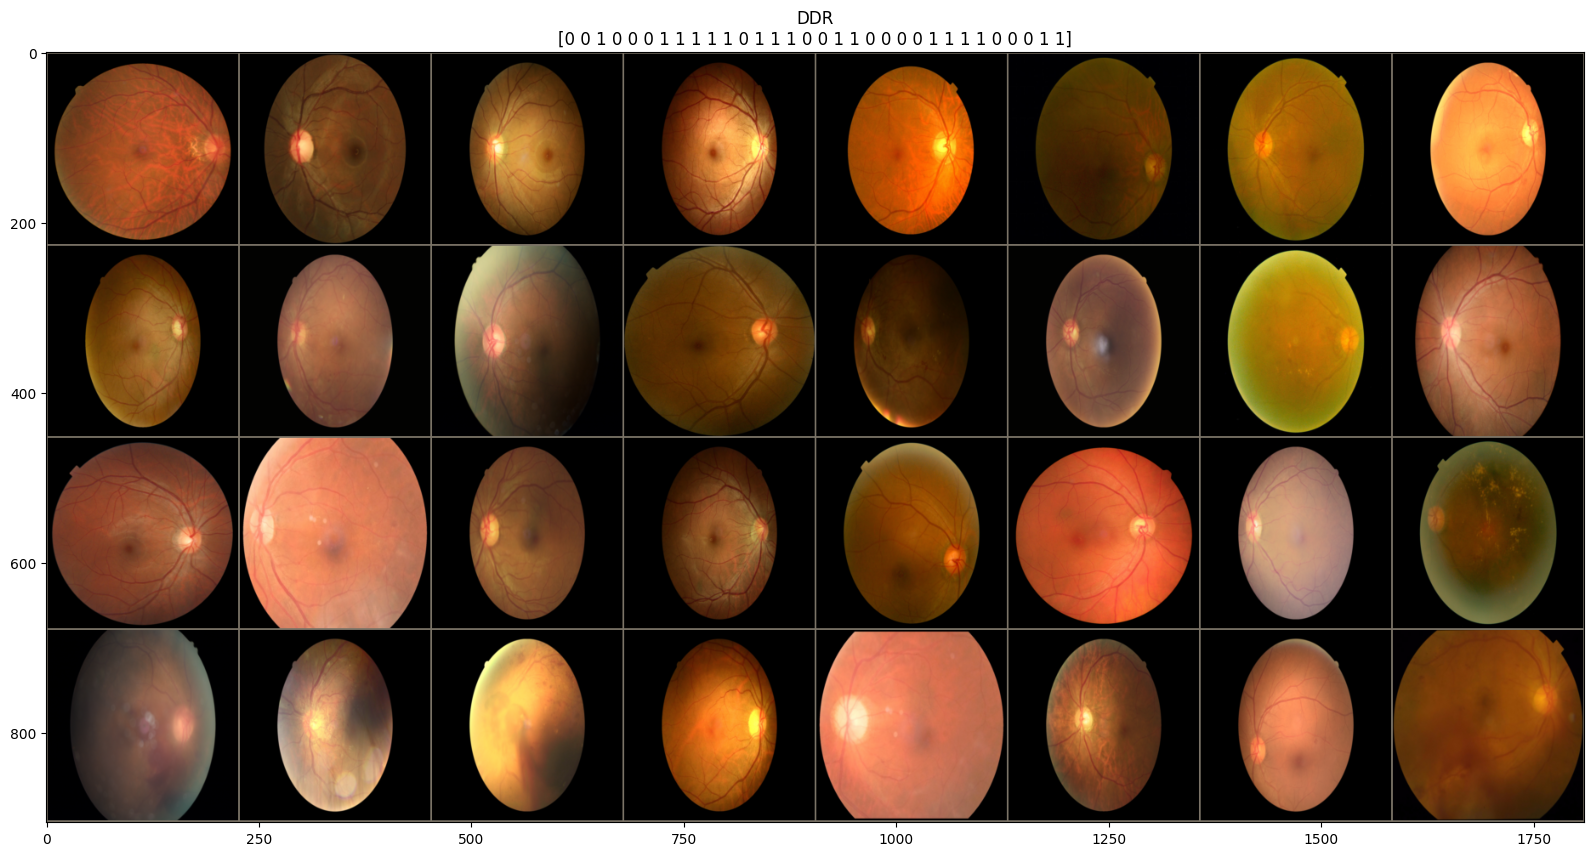

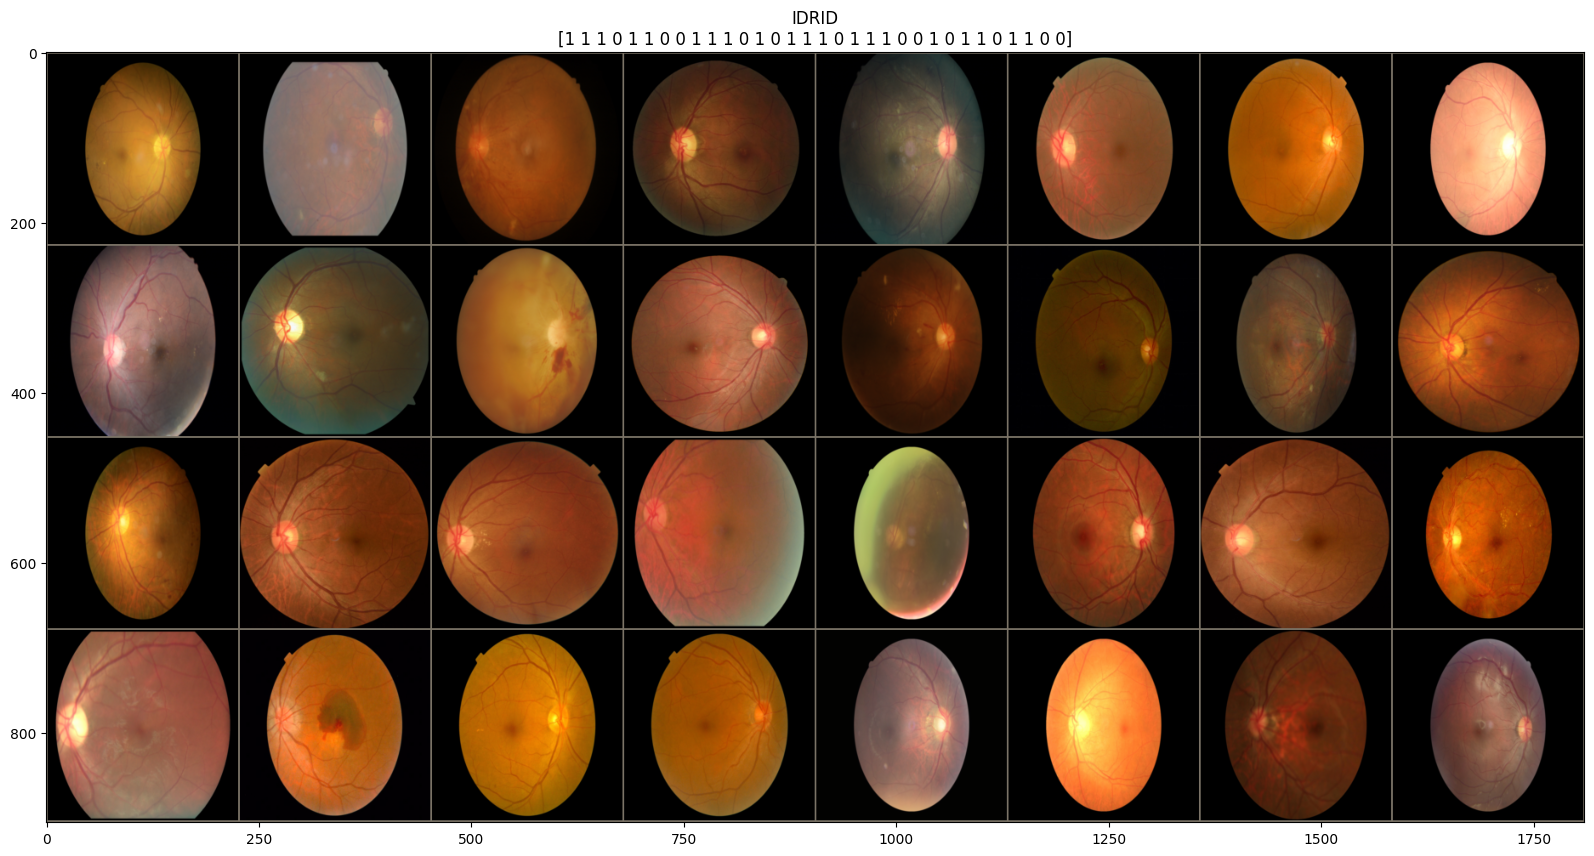

In [27]:
# # plot FGADR
# batch_fgadr = next(iter(fgadr_dataloader))
# imgs_fgadr, retinopathy_grades_fgadr = batch_fgadr['img'], batch_fgadr['retinopathy_grade']
# out_train = torchvision.utils.make_grid(imgs_fgadr)
# imshow(out_train, title='FGADR\n'+str(retinopathy_grades_fgadr.numpy()))

# plot DDR
batch_ddr = next(iter(ddr_dataloader))
imgs_ddr, retinopathy_grades_ddr = batch_ddr['img'], batch_ddr['retinopathy_grade']
out_test = torchvision.utils.make_grid(imgs_ddr)
imshow(out_test, title='DDR\n'+str(retinopathy_grades_ddr.numpy()))
# print(retinopathy_grades_ddr)

# plot IDRID
batch_idrid = next(iter(ddr_dataloader))
imgs_idrid, retinopathy_grades_idrid = batch_idrid['img'], batch_idrid['retinopathy_grade']
out_test = torchvision.utils.make_grid(imgs_idrid)
imshow(out_test, title='IDRID\n'+str(retinopathy_grades_idrid.numpy()))

In [28]:
batch_ddr['retinopathy_grade']

tensor([0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1,
        1, 1, 1, 0, 0, 0, 1, 1])

# Treino
❗❗ Duvida: usar transfer learning ou fine-tuning? <br>
❗❗ Duvida: usar one-hot encoding? <br>
❗❗ Plotar numero de imagens por classes; <br>
❗❗ testar softmax; <br>
❗❗ excluir .cache da maquina monstrona; <br>
❗❗ usar transformações de treino para todas as partes do DDR e
transformações de teste para todo o IDRID? <br>
❗❗ acrescentar calculo de tempo

#### Redes:
> VGG16 (224x224), ResNet50, MobileNet, EfficientNetB7
#### Métricas:
> Acurácia, Sensibilidade, Precisão, Especificidade, F1-score e Curva ROC

Observações:
Analise de k-fold com o Messidor;
Analise Hold-out com Messidor e IDRID;
Usar DDR ao ives do Messidor;

##### Settings

In [52]:
from torch import nn

num_classes = 5
torch.manual_seed(42)
random_state = 42
k_folds = 5
num_epochs = 2
batch_size = 64
loss_function = nn.CrossEntropyLoss()
lr=1e-3

##### VGG16 instanciation

In [11]:
from torchsummary import summary
from torchvision import models
import time
from tqdm import tqdm_notebook as tqdmntbk
import torch.nn as nn
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

# Fine tuning:
# # Instanciação VGG16
# weights = models.VGG16_Weights.DEFAULT
# vgg16 = models.vgg16(weights=vgg16_best_weights)
# # transformações específicas da rede
# vgg16_preprocess = vgg16_best_weights.transforms()
# # resetando a ultima camada totalmente conecetada
# last_key_classifier = list(vgg16_model.classifier._modules.keys())[-1]
# num_ftrs = vgg16_model.classifier._modules[last_key_classifier].in_features
# vgg16_model.classifier._modules[last_key_classifier] = nn.Linear(num_ftrs, num_classes)
# vgg16_model.to(device)


# Transfer learning:
# Instanciação VGG16_BN
weights = models.VGG16_BN_Weights.DEFAULT
vgg16 = models.vgg16_bn(weights=weights)
# transformações específicas da rede
vgg16_preprocess = weights.transforms()
# congelando os pesos da parte extratora
for param in vgg16.parameters():
    param.requires_grad = False


# modificando a camada de classificação
last_key_classifier = list(vgg16.classifier._modules.keys())[-1]
classifier_layer = list(vgg16.classifier._modules.values())[-1]
num_ftrs = classifier_layer.in_features
vgg16.classifier._modules[last_key_classifier] = nn.Linear(num_ftrs, num_classes)
vgg16 = vgg16.to(device)

In [31]:
# baseado em https://github.com/christianversloot/machine-learning-articles/blob/main/how-to-use-k-fold-cross-validation-with-pytorch.md
import torch
from sklearn.model_selection import KFold
from torch.utils.data import ConcatDataset
from torchvision.datasets import MNIST
from torch import nn, optim
from torch.nn import functional as F
from torchvision.transforms import v2
# from google.colab import auth
# from google.auth import default
from gspread_dataframe import set_with_dataframe, get_as_dataframe
import gspread
from tqdm.notebook import tqdm as tqdm
import ipywidgets as widgets
import torchmetrics


# integração com gsheets
gc = gspread.service_account(filename='.cg/test.json')
plan = gc.open('ARTIGO 1_results and history')
plan.worksheet('results').clear()
plan.worksheet('loss_history').clear()
set_with_dataframe(plan.worksheet('results'), pd.DataFrame([{'Fold': None, 'Acc': None, 'Base': None}]), include_index=False)
set_with_dataframe(plan.worksheet('loss_history'), pd.DataFrame([{'Fold': None, 'Epoch': None, 'Batch': None, 'Loss': None}]), include_index=False)

# Metodo de Split
kfold = KFold(n_splits=k_folds, shuffle=True, random_state=random_state)

# Treino
# K-fold Cross Validation model evaluation
print(f'Device: {device}')
for fold, (train_ids, test_ids) in enumerate(kfold.split(ddr_dataset)):

    # Print
    print(f'FOLD {fold}')
    print('--------------------------------')
    # Divide os dados com base nos atuais indices do K-fold
    train_dataset = torch.utils.data.Subset(ddr_dataset, train_ids)
    test_dataset = torch.utils.data.Subset(ddr_dataset, test_ids)


    # Define data loaders for training and testing data in this fold
    trainloader = torch.utils.data.DataLoader(
                      train_dataset,
                      batch_size=batch_size,
                      num_workers=2)
    testloader = torch.utils.data.DataLoader(
                      test_dataset,
                      batch_size=batch_size,
                      num_workers=2)
    idridloader = torch.utils.data.DataLoader(
                      idrid_dataset,
                      batch_size=batch_size,
                      num_workers=2)

    # Init the neural network
    network = vgg16

    optimizer = optim.Adam(network.parameters(), lr=lr)

    # Run the training loop for defined number of epochs
    for epoch in range(num_epochs):
        network.train()

        # Integração com GSheets
        lines_epoch = []
        current_df_history = get_as_dataframe(plan.worksheet('loss_history'))
        current_df_history.dropna()
        # loss, acc, precision, f1, recall = 0, 0, 0, 0, 0
        
        # Iterate over the DataLoader for training data
        for i, data in enumerate(tqdm(trainloader, 
                                      desc=f'Epoch {epoch+1}/{num_epochs}')): # | loss: {loss}, accuracy: {acc}, precision: {precision}, f1: {f1}, recall: {recall}')):

            # Get inputs
            inputs, targets = data['img'], data['retinopathy_grade']
            inputs = inputs.to(device)
            targets = targets.to(device)


            # Zero the gradients
            optimizer.zero_grad()

            # Perform forward pass
            outputs = network(inputs)


            # Compute loss and metrics
            loss = loss_function(outputs, targets)
            # acc = torchmetrics.Accuracy(task=metrics_task, num_classes=num_classes)
            # precision = torchmetrics.Precision(task=metrics_task, num_classes=num_classes)
            # f1 = torchmetrics.F1Score(task=metrics_task, num_classes=num_classes)
            # recall = torchmetrics.Recall(task=metrics_task, num_classes=num_classes)

            # acc = acc(targets, outputs)
            # precision = precision(targets, outputs)
            # f1 = f1(targets, outputs)
            # recall = recall(targets, outputs)
            
            new_loss_history_line = {'Fold': fold, 'Epoch': epoch, 'Batch': i, 'Loss': loss.item()}
            lines_epoch.append(new_loss_history_line)

            # Perform backward pass
            loss.backward()

            # Perform optimization
            optimizer.step()

            # # Print statistics
            # current_loss += loss.item()
            # if i % 10 == 0:
            #     print('Loss after mini-batch %5d: %.3f' %
            #           (i + 1, current_loss / 100))
            #     current_loss = 0.0


        # Enviando dados de treino para o GSheets
        df_epoch = pd.DataFrame(lines_epoch)
        df = pd.concat([current_df_history, df_epoch], ignore_index=True)
        df.set_index(['Fold', 'Epoch', 'Batch'], inplace=True)
        df.sort_index(inplace=True)
        set_with_dataframe(plan.worksheet('loss_history'), df, include_index=True)



    # Process is complete.
    print('Training process has finished. Saving trained model.')
    # Teste
    print('Starting testing for the test fold')
    # Saving the model
    save_path = f'./checkpoints kfold/model-fold-{fold}.pth'
    torch.save(network.state_dict(), save_path)

    # Evaluation for this fold
    correct, total = 0, 0
    correct_idrid, total_idrid = 0, 0
    with torch.no_grad():
        network.eval()

        # Iterate over the test data and generate predictions
        for i, data in enumerate(tqdm(testloader)):

            # Get inputs
            inputs, targets = data['img'], data['retinopathy_grade']
            inputs = inputs.to(device)
            targets = targets.to(device)

            # Generate outputs
            outputs = network(inputs)

            # Set total and correct
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

        # iterating on IDRID for external validation
        print('Starting testing for IDRID dataset')
        for i, data in enumerate(tqdm(idridloader)):

            # Get inputs
            inputs_idrid, targets_idrid = data['img'], data['retinopathy_grade']
            inputs_idrid = inputs_idrid.to(device)
            targets_idrid = targets_idrid.to(device)

            # Generate outputs
            outputs_idrid = network(inputs_idrid)

            # Set total and correct
            _, predicted_idrid = torch.max(outputs_idrid.data, 1)
            total_idrid += targets_idrid.size(0)
            correct_idrid += (predicted_idrid == targets_idrid).sum().item()


        # Prints the accuracy regarding the test fold
        print('Accuracy for fold %d: %d %%' % (fold, 100.0 * correct / total))
        results = {'Fold': fold, 'Acc': 100.0 * (correct / total), 'Base': 'DDR'}

        # Prints accuracy in relation to the idrid
        print('Accuracy for IDRID: %d %%' % (100.0 * correct_idrid / total_idrid))
        print('----------------w----------------')
        results_idrid = {'Fold': fold, 'Acc': 100.0 * (correct_idrid / total_idrid), 'Base': 'IDRID'}

        # Enviando dados para o GSheets
        current_df_results = get_as_dataframe(plan.worksheet('results'))
        current_df_results.dropna()
        df_results = pd.DataFrame([results, results_idrid])
        df_results = pd.concat([current_df_results, df_results], ignore_index=True)
        set_with_dataframe(plan.worksheet('results'), df_results, include_index=False)

Device: cuda:0
FOLD 0
--------------------------------


Epoch 1/40:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 2/40:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 3/40:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 4/40:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 5/40:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 6/40:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 7/40:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 8/40:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 9/40:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 10/40:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 11/40:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 12/40:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 13/40:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 14/40:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 15/40:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 16/40:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 17/40:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 18/40:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 19/40:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 20/40:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 21/40:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 22/40:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 23/40:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 24/40:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 25/40:   0%|          | 0/157 [00:00<?, ?it/s]

Epoch 26/40:   0%|          | 0/157 [00:00<?, ?it/s]

Traceback (most recent call last):
  File "/home/lesc-neuro-covid/miniconda3/envs/cbeb-env/lib/python3.9/multiprocessing/queues.py", line 251, in _feed
    send_bytes(obj)
  File "/home/lesc-neuro-covid/miniconda3/envs/cbeb-env/lib/python3.9/multiprocessing/connection.py", line 205, in send_bytes
    self._send_bytes(m[offset:offset + size])
  File "/home/lesc-neuro-covid/miniconda3/envs/cbeb-env/lib/python3.9/multiprocessing/connection.py", line 416, in _send_bytes
    self._send(header + buf)
  File "/home/lesc-neuro-covid/miniconda3/envs/cbeb-env/lib/python3.9/multiprocessing/connection.py", line 373, in _send
    n = write(self._handle, buf)
BrokenPipeError: [Errno 32] Broken pipe
Traceback (most recent call last):
  File "/home/lesc-neuro-covid/miniconda3/envs/cbeb-env/lib/python3.9/multiprocessing/queues.py", line 251, in _feed
    send_bytes(obj)
  File "/home/lesc-neuro-covid/miniconda3/envs/cbeb-env/lib/python3.9/multiprocessing/connection.py", line 205, in send_bytes
    self

KeyboardInterrupt: 

# Lighting Module

## Settings

In [3]:
from torch import nn

num_classes = 2
torch.manual_seed(42)
random_state = 42
k_folds = 5
num_epochs = 15
batch_size = 32
loss_function = nn.CrossEntropyLoss()
lr=1e-3


data_transforms = {
    'train': v2.Compose([
        v2.ToImage(),
        v2.ToDtype(torch.float32, scale=True),
        v2.Resize((224, 224)),
        v2.RandomHorizontalFlip(),
        v2.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': v2.Compose([
        v2.ToImage(),
        v2.ToDtype(torch.float32, scale=True),
        v2.Resize((224, 224)),
        v2.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

## Binary

In [4]:
# Leitura DDR
train_ddr_dataset = DDRDataset(DDR_DIR/'train',
                         DDR_DIR/'train.txt',
                         data_transforms['train'],
                         convert_to_binary=True)
valid_ddr_dataset = DDRDataset(DDR_DIR/'valid',
                         DDR_DIR/'valid.txt',
                         data_transforms['train'],
                         convert_to_binary=True)
test_ddr_dataset = DDRDataset(DDR_DIR/'test',
                         DDR_DIR/'test.txt',
                         data_transforms['train'],
                         convert_to_binary=True)

ddr_dataset = ConcatDataset([train_ddr_dataset, valid_ddr_dataset, test_ddr_dataset])



# Leitura IDRID
train_idrid_dataset = IDRIDDataset(IDRID_DIR/'1. Original Images/a. Training Set',
                                   IDRID_DIR/'2. Groundtruths/a. IDRiD_Disease Grading_Training Labels.csv',
                                   data_transforms['val'],
                                   convert_to_binary=True)
test_idrid_dataset = IDRIDDataset(IDRID_DIR/'1. Original Images/b. Testing Set',
                                  IDRID_DIR/'2. Groundtruths/b. IDRiD_Disease Grading_Testing Labels.csv',
                                  data_transforms['val'],
                                  convert_to_binary=True)
idrid_dataset = ConcatDataset([train_idrid_dataset, test_idrid_dataset])

In [5]:
# !pip install lightning -q

In [6]:
def save_metrics(dict_data, path):
    with open(path, 'w') as f:
        json.dump(dict_data, f)

In [7]:
import lightning as L
from torch import nn
from torch import optim
import torchmetrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import classification_report, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix, ConfusionMatrixDisplay, mean_squared_error, mean_absolute_error


class ClassificationModule(L.LightningModule):
    def __init__(self, model_pretrained, loss_function, optimizer):
        super().__init__()
        self.model = model_pretrained
        self.optimizer = optimizer
        self.loss_module = loss_function
        self.test_step_outputs = []
        self.training_step_outputs = []

    
    def shared_step(self, batch, stage):
        imgs, labels = batch['img'], batch['retinopathy_grade']
        preds = self.model(imgs)
        loss = self.loss_module(preds, labels)
                
        outputs = {
            "loss": loss,
            "labels": labels,
            "preds": preds
        }
        if stage == 'train':
            self.training_step_outputs.append(outputs)

        return outputs

    
    def shared_epoch_end(self, outputs, stage):
        labels = torch.cat([x["labels"] for x in outputs]).cpu()
        preds = torch.cat([x["preds"] for x in outputs]).cpu().argmax(dim=-1)
        
        acc = (preds == labels).float().mean()
        self.loss_ = self.loss_module(preds.float(), labels.float())
        if stage == 'test':

            cm = confusion_matrix(labels, preds)
            disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                                  #display_labels=['Normal', 'Pneumonia', 'Covid'])
                                  display_labels=['0', '1'])
            disp.plot(cmap='Blues')

            plt.show()
            print(classification_report(labels, preds))
            print(accuracy_score(labels, preds))
            print(f1_score(labels, preds))
            print(precision_score(labels, preds))
            print(recall_score(labels, preds))
            print(recall_score(labels, preds, pos_label=0))
        
            
        metrics = {
             f"{stage}_acc": acc,
             f"{stage}_f1": f1_score(labels, preds),
             f"{stage}_precision": precision_score(labels, preds),
             f"{stage}_recall": recall_score(labels, preds),
             
         }
        
        self.log_dict(metrics, prog_bar=True)
        
    
    def training_step(self, batch, batch_idx):
        return self.shared_step(batch, "train")

    def test_step(self, batch, batch_idx):
        self.test_step_outputs.append(self.shared_step(batch, "test"))
        return self.shared_step(batch, "test") 

    def on_train_epoch_end(self):
        outputs = self.training_step_outputs.copy()
        self.training_step_outputs.clear()
        return self.shared_epoch_end(outputs,"train")

    def on_test_epoch_end(self):
        return self.shared_epoch_end(self.test_step_outputs, 'test')

    def configure_optimizers(self):
        return self.optimizer(self.parameters(), lr=lr)

#### VGG16 instanciation

In [8]:
from torchvision import models
import time
from tqdm import tqdm_notebook as tqdmntbk
import torch.nn as nn

# Transfer learning:
# Instanciação VGG16_BN
weights = models.VGG16_BN_Weights.DEFAULT
vgg16 = models.vgg16_bn(weights=weights)
# transformações específicas da rede
vgg16_preprocess = weights.transforms()
# congelando os pesos da parte extratora
for param in vgg16.parameters():
    param.requires_grad = False


# modificando a camada de classificação
last_key_classifier = list(vgg16.classifier._modules.keys())[-1]
classifier_layer = list(vgg16.classifier._modules.values())[-1]
num_ftrs = classifier_layer.in_features
vgg16.classifier._modules[last_key_classifier] = nn.Linear(num_ftrs, num_classes)

In [9]:
vgg16

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (5): ReLU(inplace=True)
    (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (7): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (9): ReLU(inplace=True)
    (10): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (14): Conv2d(128, 256

#### Execution

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
You are using a CUDA device ('NVIDIA GeForce RTX 4070 Ti') that has Tensor Cores. To properly utilize them, you should set `torch.set_float32_matmul_precision('medium' | 'high')` which will trade-off precision for performance. For more details, read https://pytorch.org/docs/stable/generated/torch.set_float32_matmul_precision.html#torch.set_float32_matmul_precision
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type             | Params
-------------------------------------------------
0 | model       | VGG              | 134 M 
1 | loss_module | CrossEntropyLoss | 0     
-------------------------------------------------
8.2 K     Trainable params
134 M     Non-trainable params
134 M     Total params
537.109   Total estimated model params size (MB)


FOLD 0
--------------------------------


Training: |                                                                                                   …

`Trainer.fit` stopped: `max_epochs=15` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]




 TEST FOLD 0




Testing: |                                                                                                    …

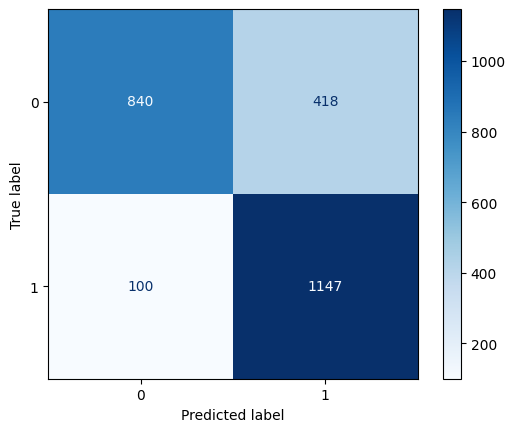

              precision    recall  f1-score   support

           0       0.89      0.67      0.76      1258
           1       0.73      0.92      0.82      1247

    accuracy                           0.79      2505
   macro avg       0.81      0.79      0.79      2505
weighted avg       0.81      0.79      0.79      2505

0.7932135728542914
0.8157894736842105
0.7329073482428115
0.9198075380914194
0.6677265500794912
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.7932135462760925
         test_f1            0.8157894611358643
     test_precision         0.7329073548316956
       test_recall          0.9198075532913208
────────────────────────────────────────────────────────────────────────────────────────────────────────

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]




 TESTE IDRID 




Testing: |                                                                                                    …

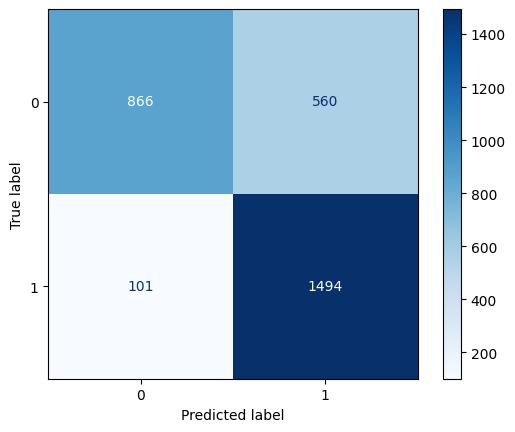

              precision    recall  f1-score   support

           0       0.90      0.61      0.72      1426
           1       0.73      0.94      0.82      1595

    accuracy                           0.78      3021
   macro avg       0.81      0.77      0.77      3021
weighted avg       0.81      0.78      0.77      3021

0.7811982787156571
0.8188544806796383
0.7273612463485881
0.9366771159874608
0.6072931276297335
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc             0.781198263168335
         test_f1            0.8188544511795044
     test_precision          0.727361261844635
       test_recall           0.936677098274231
────────────────────────────────────────────────────────────────────────────────────────────────────────

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type             | Params
-------------------------------------------------
0 | model       | VGG              | 134 M 
1 | loss_module | CrossEntropyLoss | 0     
-------------------------------------------------
8.2 K     Trainable params
134 M     Non-trainable params
134 M     Total params
537.109   Total estimated model params size (MB)


FOLD 1
--------------------------------


Training: |                                                                                                   …

`Trainer.fit` stopped: `max_epochs=15` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]




 TEST FOLD 1




Testing: |                                                                                                    …

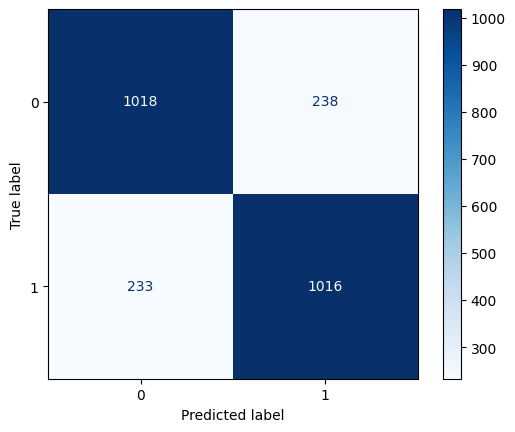

              precision    recall  f1-score   support

           0       0.81      0.81      0.81      1256
           1       0.81      0.81      0.81      1249

    accuracy                           0.81      2505
   macro avg       0.81      0.81      0.81      2505
weighted avg       0.81      0.81      0.81      2505

0.8119760479041916
0.811825809029165
0.810207336523126
0.8134507606084868
0.8105095541401274
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.8119760751724243
         test_f1            0.8118258118629456
     test_precision         0.8102073073387146
       test_recall          0.8134507536888123
──────────────────────────────────────────────────────────────────────────────────────────────────────────

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]




 TESTE IDRID 




Testing: |                                                                                                    …

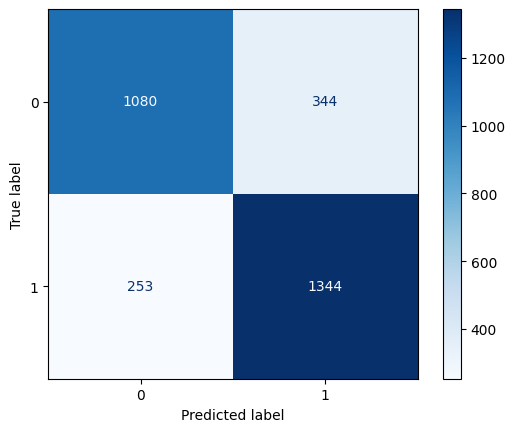

              precision    recall  f1-score   support

           0       0.81      0.76      0.78      1424
           1       0.80      0.84      0.82      1597

    accuracy                           0.80      3021
   macro avg       0.80      0.80      0.80      3021
weighted avg       0.80      0.80      0.80      3021

0.8023833167825224
0.8182648401826484
0.7962085308056872
0.841577958672511
0.7584269662921348
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc             0.802383303642273
         test_f1            0.8182648420333862
     test_precision         0.7962085604667664
       test_recall           0.84157794713974
──────────────────────────────────────────────────────────────────────────────────────────────────────────

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]


FOLD 2
--------------------------------



  | Name        | Type             | Params
-------------------------------------------------
0 | model       | VGG              | 134 M 
1 | loss_module | CrossEntropyLoss | 0     
-------------------------------------------------
8.2 K     Trainable params
134 M     Non-trainable params
134 M     Total params
537.109   Total estimated model params size (MB)


Training: |                                                                                                   …

`Trainer.fit` stopped: `max_epochs=15` reached.
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]




 TEST FOLD 2




Testing: |                                                                                                    …

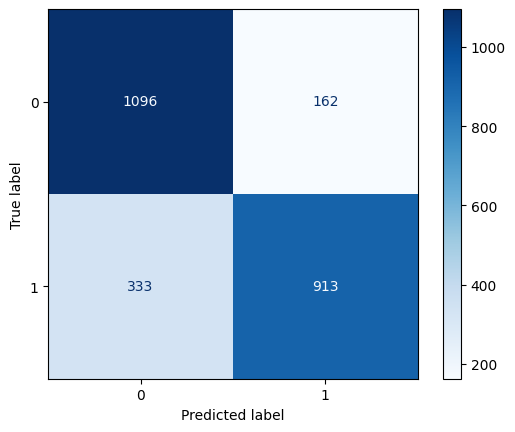

              precision    recall  f1-score   support

           0       0.77      0.87      0.82      1258
           1       0.85      0.73      0.79      1246

    accuracy                           0.80      2504
   macro avg       0.81      0.80      0.80      2504
weighted avg       0.81      0.80      0.80      2504

0.8023162939297125
0.7867298578199052
0.8493023255813954
0.7327447833065811
0.8712241653418124
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.8023163080215454
         test_f1            0.7867298722267151
     test_precision          0.849302351474762
       test_recall          0.7327448129653931
────────────────────────────────────────────────────────────────────────────────────────────────────────

LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]




 TESTE IDRID 




Testing: |                                                                                                    …

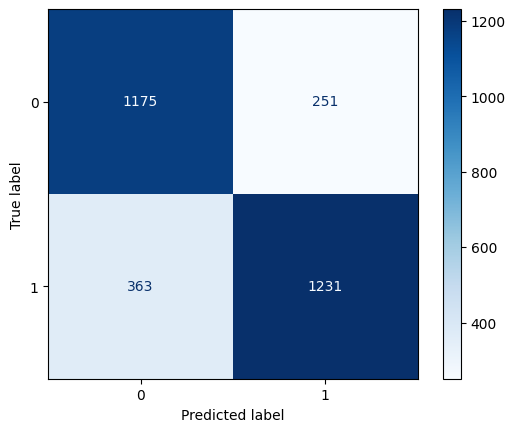

              precision    recall  f1-score   support

           0       0.76      0.82      0.79      1426
           1       0.83      0.77      0.80      1594

    accuracy                           0.80      3020
   macro avg       0.80      0.80      0.80      3020
weighted avg       0.80      0.80      0.80      3020

0.7966887417218543
0.8003901170351105
0.8306342780026991
0.7722710163111669
0.8239831697054698
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
       Test metric             DataLoader 0
────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────
        test_acc            0.7966887354850769
         test_f1            0.8003901243209839
     test_precision         0.8306342959403992
       test_recall          0.7722710371017456
────────────────────────────────────────────────────────────────────────────────────────────────────────

GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
IPU available: False, using: 0 IPUs
HPU available: False, using: 0 HPUs
LOCAL_RANK: 0 - CUDA_VISIBLE_DEVICES: [0]

  | Name        | Type             | Params
-------------------------------------------------
0 | model       | VGG              | 134 M 
1 | loss_module | CrossEntropyLoss | 0     
-------------------------------------------------
8.2 K     Trainable params
134 M     Non-trainable params
134 M     Total params
537.109   Total estimated model params size (MB)


FOLD 3
--------------------------------


Training: |                                                                                                   …

In [ ]:
from lightning.pytorch.loggers import TensorBoardLogger
from sklearn.model_selection import KFold

kfold = KFold(n_splits=k_folds, shuffle=True, random_state=random_state)

for fold, (train_ids, test_ids) in enumerate(kfold.split(ddr_dataset)):
    print(f'FOLD {fold}')
    print('--------------------------------')
    # Divide os dados com base nos atuais indices do K-fold
    train_dataset = torch.utils.data.Subset(ddr_dataset, train_ids)
    test_dataset = torch.utils.data.Subset(ddr_dataset, test_ids)


    # Definição dos dataloaders
    trainloader = torch.utils.data.DataLoader(
                      train_dataset,
                      batch_size=batch_size,
                      shuffle=True,
                      num_workers=20)
    testloader = torch.utils.data.DataLoader(
                      test_dataset,
                      batch_size=batch_size,
                      shuffle=False,
                      num_workers=20)
    idridloader = torch.utils.data.DataLoader(
                      idrid_dataset,
                      batch_size=batch_size,
                      num_workers=20)

    # DEBUG:
    # trainer = L.Trainer(fast_dev_run=4) # a execução do trainer se limitará a 2 batches
    # trainer = L.Trainer(limit_train_batches=30, max_epochs=1) # usar apenas 30% dos dados de cada lote de treino
    trainer = L.Trainer(default_root_dir='checkpoints kfold/', accelerator='gpu', max_epochs=num_epochs)


    
    # treino
    vgg16_model = ClassificationModule(vgg16, loss_function, optim.Adam)
    trainer.fit(model=vgg16_model, train_dataloaders=trainloader)
    # teste
    print(f'\n\n TEST FOLD {fold}\n\n')    
    trainer.test(model=vgg16_model, dataloaders=testloader) # test na fold de test 
    print('\n\n TESTE IDRID \n\n')    
    trainer.test(model=vgg16_model, dataloaders=idridloader) # test no idrid
    

##### ResNet50

In [ ]:
# Instanciação ResNet50
res50_best_weights = models.ResNet50_Weights.DEFAULT
res50_model = models.resnet50(weights=res50_best_weights)
res50_preprocess = res50_best_weights.transforms()


Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 62.6MB/s]


In [ ]:
res50_model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

##### MobileNet-V2



In [ ]:
# Instanciação MobileNetv2
mobv2_best_weights = models.MobileNet_V2_Weights.DEFAULT
mobv2_model = models.mobilenet_v2(weights=mobv2_best_weights)
mobv2_preprocess = mobv2_best_weights.transforms()

Downloading: "https://download.pytorch.org/models/mobilenet_v2-7ebf99e0.pth" to /root/.cache/torch/hub/checkpoints/mobilenet_v2-7ebf99e0.pth
100%|██████████| 13.6M/13.6M [00:00<00:00, 51.2MB/s]


In [ ]:
mobv2_model

MobileNetV2(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU6(inplace=True)
    )
    (1): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False)
          (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU6(inplace=True)
        )
        (1): Conv2d(32, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
    )
    (2): InvertedResidual(
      (conv): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 96, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(96, eps=

##### EfficientNet-b7

In [ ]:
# Instanciação EfficientNetB7
effcb7_best_weights = models.EfficientNet_B7_Weights.DEFAULT
effcb7_model = models.efficientnet_b7(weights=effcb7_best_weights)
effcb7_preprocess = effcb7_best_weights.transforms()

Downloading: "https://download.pytorch.org/models/efficientnet_b7_lukemelas-c5b4e57e.pth" to /root/.cache/torch/hub/checkpoints/efficientnet_b7_lukemelas-c5b4e57e.pth
100%|██████████| 255M/255M [00:05<00:00, 50.6MB/s]


In [ ]:
effcb7_model

EfficientNet(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(64, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): SiLU(inplace=True)
    )
    (1): Sequential(
      (0): MBConv(
        (block): Sequential(
          (0): Conv2dNormActivation(
            (0): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
            (1): BatchNorm2d(64, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
            (2): SiLU(inplace=True)
          )
          (1): SqueezeExcitation(
            (avgpool): AdaptiveAvgPool2d(output_size=1)
            (fc1): Conv2d(64, 16, kernel_size=(1, 1), stride=(1, 1))
            (fc2): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1))
            (activation): SiLU(inplace=True)
            (scale_activation): Sigmoid()
          )
          (2): Conv2dNormAct

In [ ]:
preprocess(tensor_test.permute(2, 0, 1))

tensor([[[-2.1179, -2.1179, -2.1179,  ..., -2.1008, -2.1179, -2.1008],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1008, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1008, -2.1179, -2.1179],
         ...,
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1179, -2.1179],
         [-2.1179, -2.1179, -2.1179,  ..., -2.1179, -2.1008, -2.1179],
         [-2.1179, -2.1008, -2.1179,  ..., -2.1179, -2.0837, -2.1179]],

        [[-2.0007, -2.0007, -2.0182,  ..., -2.0007, -2.0182, -2.0007],
         [-2.0182, -2.0007, -2.0007,  ..., -2.0182, -2.0182, -2.0007],
         [-2.0007, -2.0007, -2.0182,  ..., -2.0182, -2.0182, -2.0182],
         ...,
         [-2.0007, -2.0182, -2.0007,  ..., -2.0182, -2.0182, -2.0182],
         [-2.0007, -2.0182, -2.0182,  ..., -2.0182, -2.0182, -2.0182],
         [-2.0182, -2.0182, -2.0182,  ..., -2.0357, -2.0182, -2.0182]],

        [[-1.8044, -1.8044, -1.8044,  ..., -1.8044, -1.8044, -1.8044],
         [-1.8044, -1.8044, -1.8044,  ..., -1